In [4]:
#데이터셋 저장
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"exampl1","key":"2f519095cd049a6f96a31b09dfb88d44"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d zalando-research/fashionmnist

 95% 65.0M/68.8M [00:00<00:00, 101MB/s]
100% 68.8M/68.8M [00:00<00:00, 105MB/s]


In [8]:
!ls

fashion-mnist_test.csv	    fashionmnist.zip  t10k-images-idx3-ubyte
fashion-mnist_test.csv.zip  kaggle.json       t10k-labels-idx1-ubyte
fashion-mnist_train.csv     sample_data       train-images-idx3-ubyte


In [14]:
import numpy as np
from torch.utils.data import DataLoader
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from random import sample

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


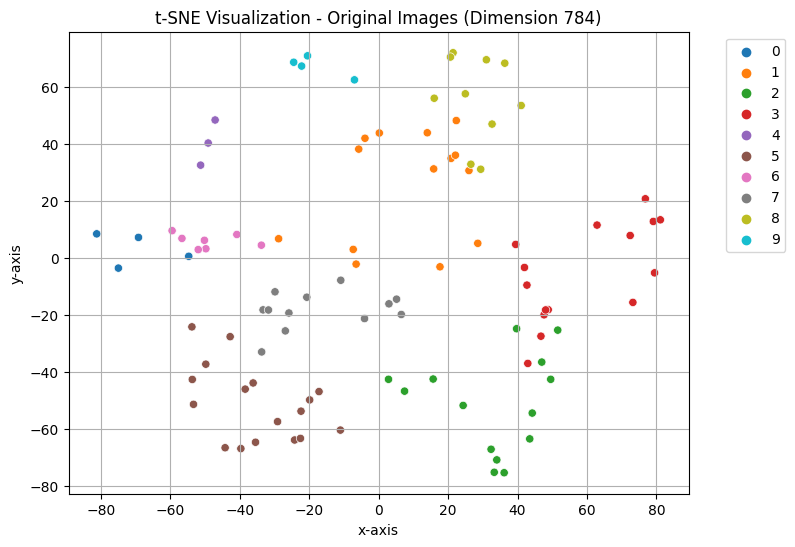

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


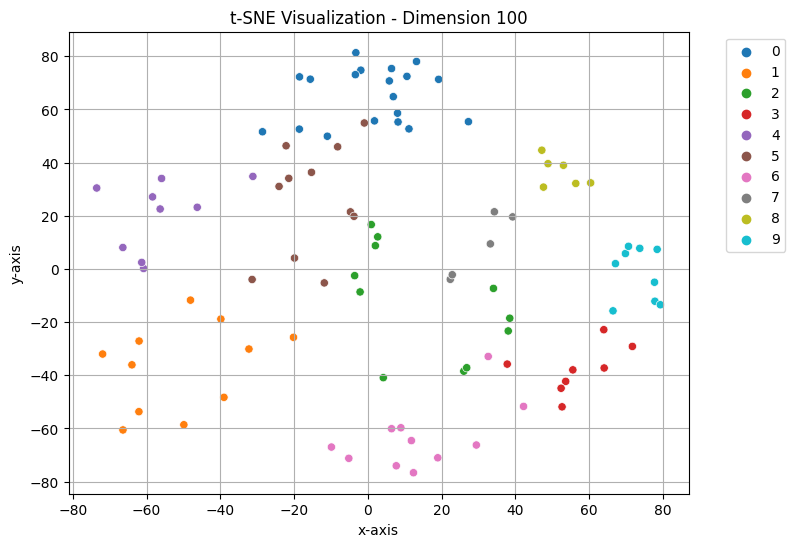

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


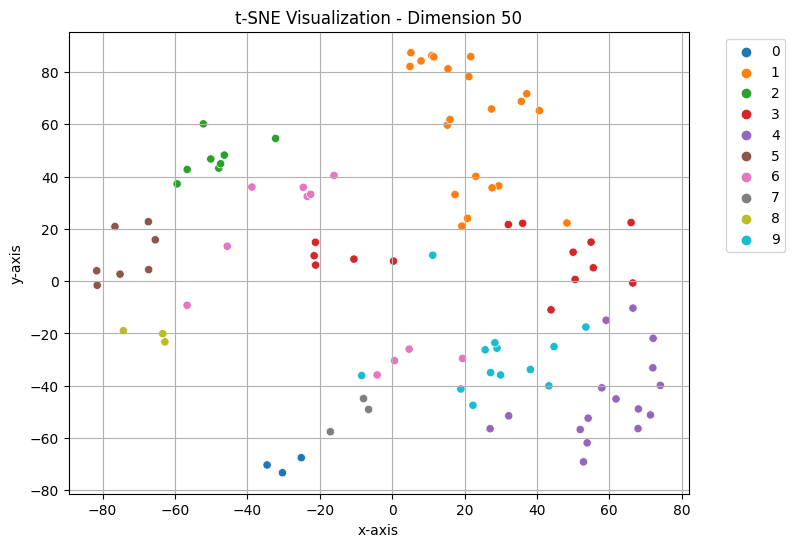

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


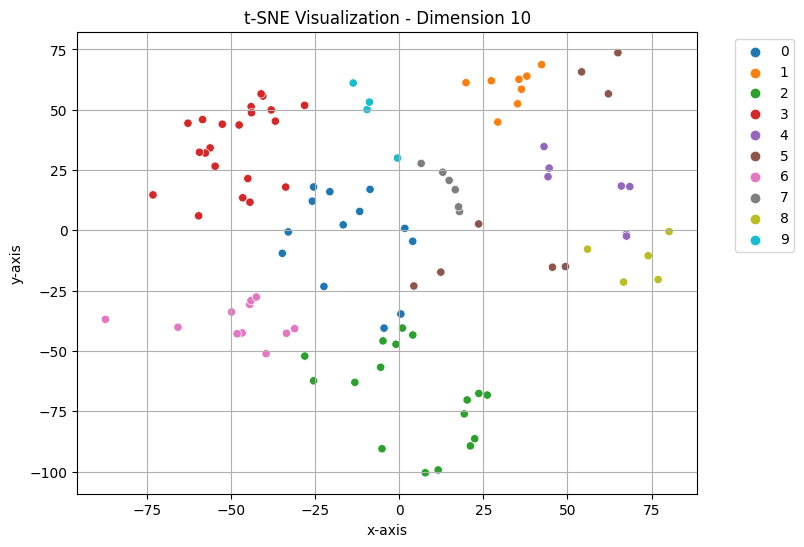

In [12]:
ds = pd.read_csv('/content/fashion-mnist_test.csv')

X_ = ds.drop("label", axis=1)
y_ = ds["label"]

#Implement k-means
#PCA 활용하여 차원 줄이기
pca_784 = PCA(n_components=784)
pca_100 = PCA(n_components=100)
pca_50 = PCA(n_components=50)
pca_10 = PCA(n_components=10)

test_PCA_784 = pca_784.fit_transform(X_)
test_PCA_100 = pca_100.fit_transform(X_)
test_PCA_50 = pca_50.fit_transform(X_)
test_PCA_10 = pca_10.fit_transform(X_)

#original Image인 차원 784일때 KMeans 알고리즘 실행
kmeans_784 = KMeans(n_clusters=10, random_state=0)
labels_784 = kmeans_784.fit_predict(test_PCA_784)

# 차원 784일때 t-SNE 시각화
tsne_784 = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random')
X_tsne_784 = tsne_784.fit_transform(test_PCA_784)

# 무작위로 100개의 샘플 선택
random_samples_784 = sample(range(len(X_tsne_784)), 100)
X_samples_784 = X_tsne_784[random_samples_784]
y_samples_784 = y_[random_samples_784]

# t-SNE 시각화 하기 위한 데이터 프레임 생성
testDF_784 = pd.DataFrame(data=X_samples_784, columns=['x-axis', 'y-axis'])
testDF_784['Label'] = y_samples_784.values
testDF_784['Lables with Original dimension 784'] = labels_784[random_samples_784]

#plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=testDF_784, x='x-axis', y='y-axis', hue='Lables with Original dimension 784', palette='tab10')
plt.title('t-SNE Visualization - Original Images (Dimension 784)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 차원이 100일때 KMeans 알고리즘 실행
kmeans_100 = KMeans(n_clusters=10, random_state=0)
labels_100 = kmeans_100.fit_predict(test_PCA_100)

# 차원이 100일때 t-SNE 시각화
tsne_100 = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random')
X_tsne_100 = tsne_100.fit_transform(test_PCA_100)

# 무작위로 100개의 샘플 선택
random_samples_100 = sample(range(len(X_tsne_100)), 100)
X_samples_100 = X_tsne_100[random_samples_100]
y_samples_100 = y_[random_samples_100]

# 차원이 100일때 t-SNE 시각화 하기 위한 데이터 프레임 생성
testDF_100 = pd.DataFrame(data=X_samples_100, columns=['x-axis', 'y-axis'])
testDF_100['Label'] = y_samples_100.values
testDF_100['Labels with Dimension 100'] = labels_100[random_samples_100]

#plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=testDF_100, x='x-axis', y='y-axis', hue='Labels with Dimension 100', palette='tab10')
plt.title('t-SNE Visualization - Dimension 100')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 차원이 50일때 KMeans 알고리즘 실행
kmeans_50 = KMeans(n_clusters=10, random_state=0)
labels_50 = kmeans_50.fit_predict(test_PCA_50)

# 차원이 50일때 t-SNE 시각화
tsne_50 = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random')
X_tsne_50 = tsne_50.fit_transform(test_PCA_50)

# 무작위로 100개의 샘플 선택
random_samples_50 = sample(range(len(X_tsne_50)), 100)
X_samples_50 = X_tsne_50[random_samples_50]
y_samples_50 = y_[random_samples_50]

# 차원이 50일때 t-SNE 시각화 하기 위한 데이터 프레임 생성
testDF_50 = pd.DataFrame(data=X_samples_50, columns=['x-axis', 'y-axis'])
testDF_50['Label'] = y_samples_50.values
testDF_50['Labels with Dimension 50'] = labels_50[random_samples_50]

#plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=testDF_50, x='x-axis', y='y-axis', hue='Labels with Dimension 50', palette='tab10')
plt.title('t-SNE Visualization - Dimension 50')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 차원이 10일때 KMeans 알고리즘 실행
kmeans_10 = KMeans(n_clusters=10, random_state=0)
labels_10 = kmeans_10.fit_predict(test_PCA_10)

# 차원이 10일때 t-SNE 시각화
tsne_10 = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random')
X_tsne_10 = tsne_10.fit_transform(test_PCA_10)

# 무작위로 100개의 샘플 선택
random_samples_10 = sample(range(len(X_tsne_10)), 100)
X_samples_10 = X_tsne_10[random_samples_10]
y_samples_10 = y_[random_samples_10]

# 차원이 10일때 t-SNE 시각화 하기 위한 데이터 프레임 생성
testDF_10 = pd.DataFrame(data=X_samples_10, columns=['x-axis', 'y-axis'])
testDF_10['Label'] = y_samples_10.values
testDF_10['Labels with Dimension 10'] = labels_10[random_samples_10]

#plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=testDF_10, x='x-axis', y='y-axis', hue='Labels with Dimension 10', palette='tab10')
plt.title('t-SNE Visualization - Dimension 10')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
#ARI값 계산
ari_784 = metrics.adjusted_rand_score(y_, labels_784)
ari_100 = metrics.adjusted_rand_score(y_, labels_100)
ari_50 = metrics.adjusted_rand_score(y_, labels_50)
ari_10 = metrics.adjusted_rand_score(y_, labels_10)

# 결과 테이블 출력
result = pd.DataFrame({
    'Dimension': ['784', '100', '50', '10'],
    'ARI': [ari_784, ari_100, ari_50, ari_10]
})

print("ARI result")
print(result)

ARI result
  Dimension       ARI
0       784  0.343258
1       100  0.342292
2        50  0.342603
3        10  0.340881


Clustering Result - Dimension 784
Cluster  Label
-1       0        1000
         1        1000
         2        1000
         3        1000
         4        1000
         5        1000
         6        1000
         7        1000
         8        1000
         9        1000
dtype: int64



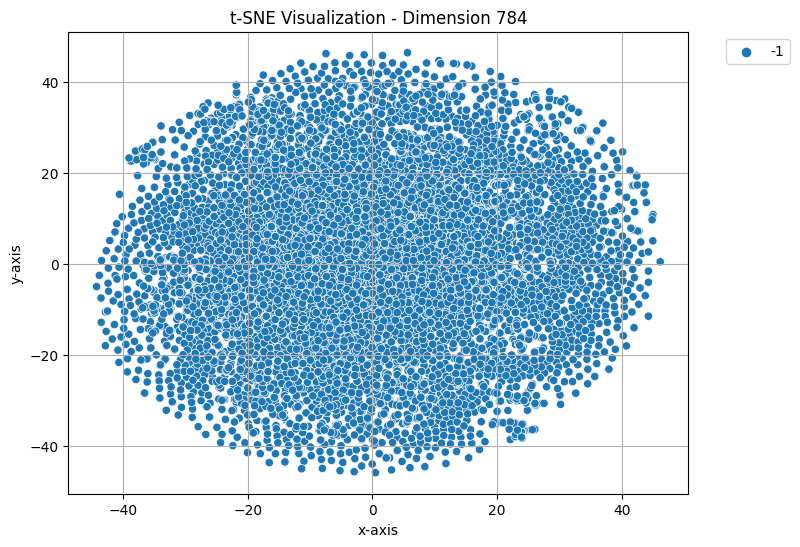

Clustering Result - Dimension 100
Cluster  Label
-1       0        1000
         1        1000
         2        1000
         3        1000
         4        1000
         5        1000
         6        1000
         7        1000
         8        1000
         9        1000
dtype: int64



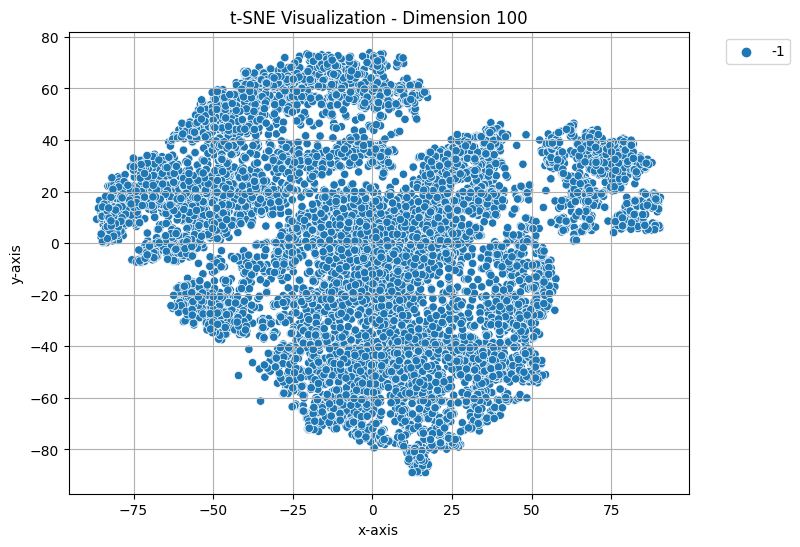

Clustering Result - Dimension 50
Cluster  Label
-1       0        1000
         1        1000
         2        1000
         3        1000
         4        1000
         5        1000
         6        1000
         7        1000
         8        1000
         9        1000
dtype: int64



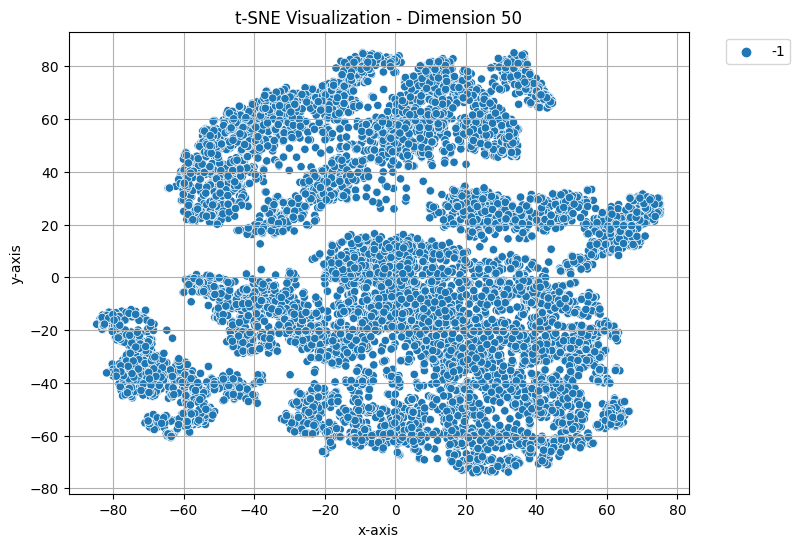

Clustering Result - Dimension 10
Cluster  Label
-1       0        901
         1        361
         2        966
         3        924
         4        991
                 ... 
 48      3          5
 49      0          4
 50      6          5
 51      0          2
         6          2
Length: 87, dtype: int64



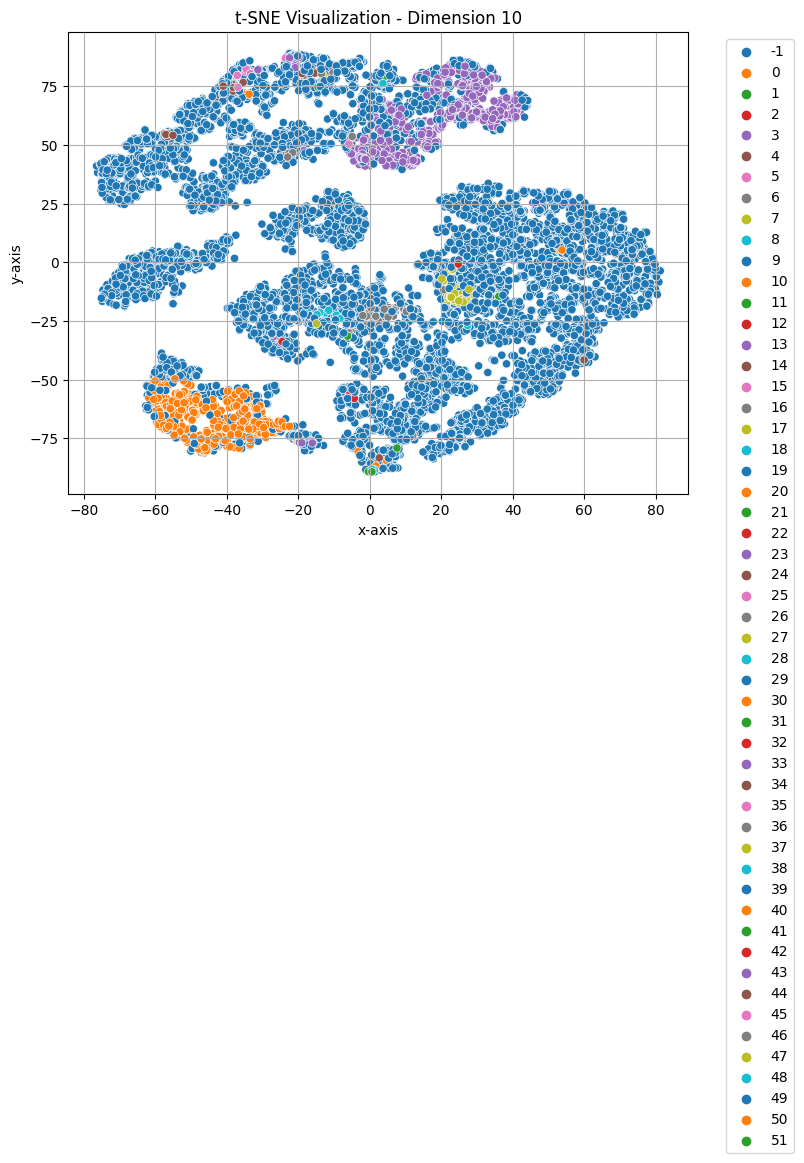

In [16]:
#Implement DBSCAN
dimensions = [784, 100, 50, 10]

for dim in dimensions:
    #PCA활용하여 차원 줄이기
    pca = PCA(n_components=dim)
    test_PCA = pca.fit_transform(X_)

    # 데이터 스케일링
    scaler = StandardScaler()
    test_scaled = scaler.fit_transform(test_PCA)

     # DBSCAN 수행
    eps = 0.5  
    min_samples = 5  
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(test_scaled)

    # 클러스터링 결과를 저장할 데이터프레임 생성
    df = pd.DataFrame({'Label': y_, 'Cluster': labels})

    # 클러스터링 결과를 테이블로 출력
    print(f"Clustering Result - Dimension {dim}")
    print(df.groupby(['Cluster', 'Label']).size())
    print()

    # t-SNE 시각화
    tsne = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random')
    X_tsne = tsne.fit_transform(test_scaled)

    # t-SNE 시각화 하기 위한 데이터프레임 생성
    vis_df = pd.DataFrame(data=X_tsne, columns=['x-axis', 'y-axis'])
    vis_df['Label'] = y_.values
    vis_df['Cluster'] = labels

    # plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=vis_df, x='x-axis', y='y-axis', hue='Cluster', palette='tab10')
    plt.title(f't-SNE Visualization - Dimension {dim}')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()